In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
file = "data/ngc1245.csv"
df = pd.read_csv(file)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,starNumber,B,V,B-V,V_corrected,B-V_corrected,spectral_type
0,3,11.673,10.964,0.709,10.004,0.409,F
1,5,12.705,11.768,0.937,10.808,0.637,G
2,6,13.204,12.029,1.175,11.069,0.875,K
3,7,12.707,12.440,0.267,11.480,-0.033,B
4,9,14.188,13.489,0.699,12.529,0.399,F


In [36]:
def distanceModulus(m, M): # m = apparent V magnitude, M = absolute magnitude of star with similar B-V color
    return 10.0 ** ((m - M + 5.0) / 5.0)

In [85]:
OStars = df[df['spectral_type'] == 'O']
BStars = df[df['spectral_type'] == 'B']
AStars = df[df['spectral_type'] == 'A']
FStars = df[df['spectral_type'] == 'F']
GStars = df[df['spectral_type'] == 'G']
KStars = df[df['spectral_type'] == 'K']
# Calculate the mode, median, and mean for B-V_corrected
median_O = np.median(OStars['B-V_corrected'])
median_B = np.median(BStars['B-V_corrected'])
median_A = np.median(AStars['B-V_corrected'])
median_F = np.median(FStars['B-V_corrected'])
median_G = np.median(GStars['B-V_corrected'])
median_K = np.median(KStars['B-V_corrected'])
print(median_O, median_B, median_A, median_F, median_G, median_K)

-0.336999999999999 -0.0460000000000022 0.23299999999999946 0.4070000000000007 0.6674999999999993 0.8950000000000002


In [149]:
#Altair Calculation for A-Type stars (B-V = 0.22)
AMags = AStars['V_corrected']
AltairMag = 2.22
ADistances = distanceModulus(AMags, AltairMag)
ADistance = np.median(ADistances)
print(ADistance, 'parsecs')

2371.924890655891 parsecs


In [148]:
#Psi Capricorni Calculation for F-Type stars (B-V = 0.42)
FMags = FStars['V_corrected']
ProcyonAMag = 3.33
FDistances = distanceModulus(FMags, ProcyonAMag)
FDistance = np.median(FDistances)
print(FDistance, 'parsecs')

2436.688423459582 parsecs


In [147]:
#Sun Calculation for G-Type Stars
GMags = GStars['V_corrected']
SunMag = 4.83
GDistances = distanceModulus(GMags, SunMag)
GDistance = np.median(GDistances)
print(GDistance, 'parsecs')

1766.2051995378897 parsecs


In [146]:
#HD 4628 Calculation for K-Type Stars
KMags = KStars['V_corrected']
HD4628Mag = 6.37
KDistances = distanceModulus(KMags, SunMag)
KDistance = np.median(KDistances)
print(KDistance, 'parsecs')

988.8143332396219 parsecs


In [168]:
allDistances = np.concatenate((ADistances, FDistances, GDistances, KDistances), axis=0)
allDistances.sort()
np.mean(allDistances)
#find standard deviation of allDistances
np.std(allDistances)
#find IQR of allDistances
q75, q25 = np.percentile(allDistances, [75 ,25])
iqr = q75 - q25
print(iqr)

1436.6167714602916


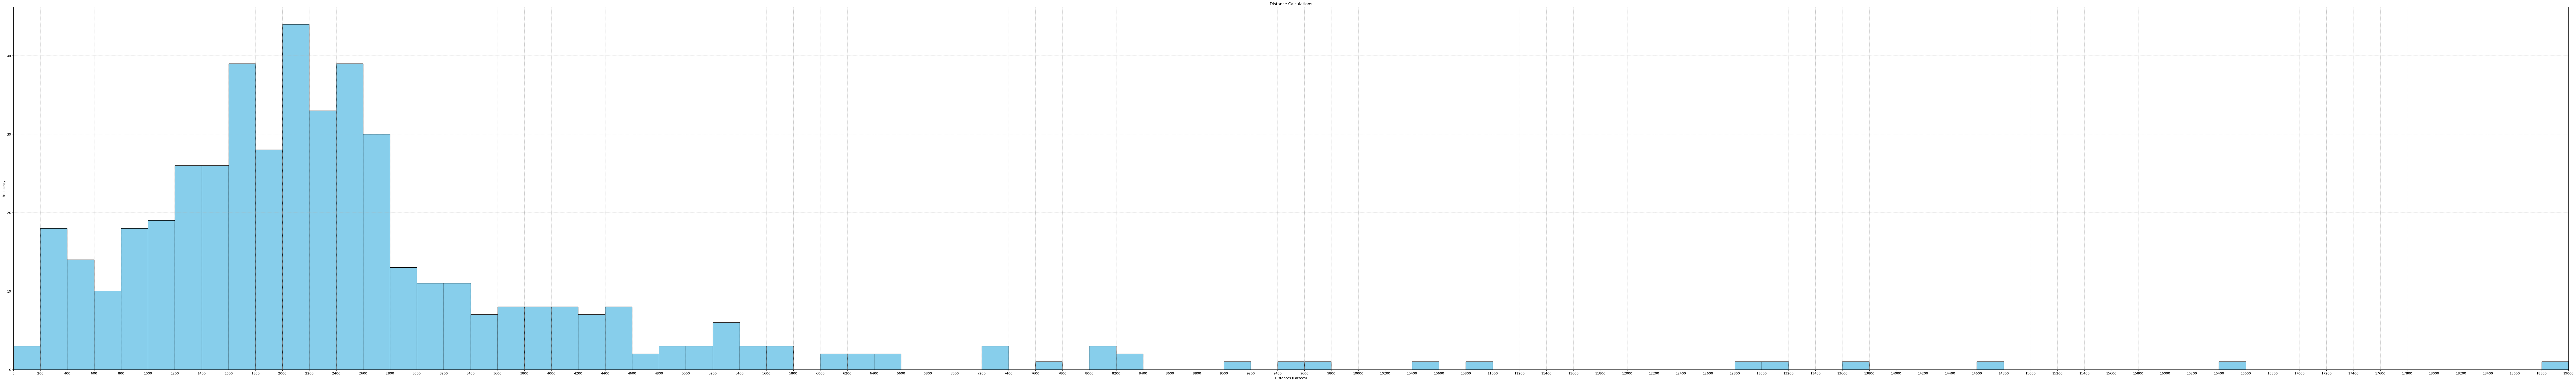

In [157]:
bin_spacing = 200

# Calculate the number of bins based on the bin spacing
num_bins = int(19000 / bin_spacing)

plt.figure(figsize=(140, 20))
n, bins, patches = plt.hist(allDistances, bins=num_bins, range=(0, num_bins * bin_spacing), color='skyblue', edgecolor='black')
plt.xlabel('Distances (Parsecs)')
plt.ylabel('Frequency')
plt.title('Distance Calculations')

# Set the x-axis limits and tick locations
plt.xlim(0, num_bins * bin_spacing)
plt.xticks(np.arange(0, (num_bins + 1) * bin_spacing, bin_spacing))

# Show gridlines aligned with both major and minor ticks
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.savefig('DistanceComputation.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Reference Stars
$A:$ Altair $(B-V) = 0.22, V = 2.22$
#do same for F,G,K
$F:$ 

In [161]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to save the plots
pdf_pages = PdfPages('B_V-Distributions.pdf')

#Only 3 O stars and 9 B stars do did not plot them.

# Plot for A-type Stars
plt.figure(figsize=(10, 6))
plt.hist(AStars['B-V_corrected'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('B-V Corrected')
plt.ylabel('Frequency')
plt.title('Distribution of B-V Corrected for A-type Stars')
plt.grid(True)
pdf_pages.savefig()
plt.close()

# Plot for F-type Stars
plt.figure(figsize=(10, 6))
plt.hist(FStars['B-V_corrected'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('B-V Corrected')
plt.ylabel('Frequency')
plt.title('Distribution of B-V Corrected for F-type Stars')
plt.grid(True)
pdf_pages.savefig()
plt.close()

# Plot for G-type Stars
plt.figure(figsize=(10, 6))
plt.hist(GStars['B-V_corrected'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('B-V Corrected')
plt.ylabel('Frequency')
plt.title('Distribution of B-V Corrected for G-type Stars')
plt.grid(True)
pdf_pages.savefig()
plt.close()

# Plot for K-type Stars
plt.figure(figsize=(10, 6))
plt.hist(KStars['B-V_corrected'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('B-V Corrected')
plt.ylabel('Frequency')
plt.title('Distribution of B-V Corrected for K-type Stars')
plt.grid(True)
pdf_pages.savefig()
plt.close()

pdf_pages.close()